In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

LV end diastolic volume 22421-2.0	


LV end systolic volume 22422-2.0	


Body surface area  22427-2.0

In [7]:
df = pd.read_csv("I:/UKB_DATA/main_df/ukb45494.csv", usecols= ['eid', '22421-2.0', '22422-2.0', '22427-2.0'])

In [10]:
df = df.rename(columns = {'22421-2.0':"LVEDV",
                     '22422-2.0':"LVESV",
                     '22427-2.0': "BSA" })

In [23]:
df[['eid','LVEDV']].rename(columns={'eid':'idx','LVEDV':'pheno'}).dropna().to_csv("I:/UKB_DATA/tsv_pheno/LVEDV.tsv",sep='\t')

In [24]:
df[['eid','LVESV']].rename(columns={'eid':'idx','LVESV':'pheno'}).dropna().to_csv("I:/UKB_DATA/tsv_pheno/LVESV.tsv",sep='\t')

In [34]:
temp_df = df[['eid','LVEDV','BSA']].dropna()
temp_df['LVEDVi'] = temp_df['LVEDV']/temp_df['BSA']
temp_df[['eid', 'LVEDVi']].rename(columns={'eid':'idx', 'LVEDVi': 'pheno'}).to_csv("I:/UKB_DATA/tsv_pheno/LVEDVi.tsv",sep='\t')

In [35]:
temp_df = df[['eid','LVESV','BSA']].dropna()
temp_df['LVESVi'] = temp_df['LVESV']/temp_df['BSA']
temp_df[['eid', 'LVESVi']].rename(columns={'eid':'idx', 'LVESVi': 'pheno'}).to_csv("I:/UKB_DATA/tsv_pheno/LVESVi.tsv",sep='\t')

Now analysis

In [55]:
df_lvedvi = pd.read_csv("I:/UKB_DATA/tsv_pheno/LVEDVi.tsv",sep='\t')

In [56]:
np.mean(df_lvedvi['pheno'])

75.27243310957967

In [57]:
np.std(df_lvedvi['pheno'])

53.501560028544176

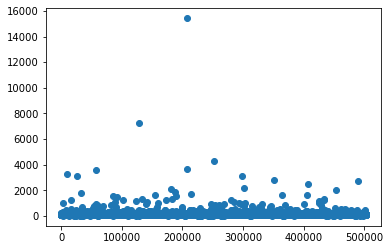

In [64]:
plt.scatter(np.arange(len(df['LVEDV'])), df['LVEDV'])

In [58]:
df_lvesvi = pd.read_csv("I:/UKB_DATA/tsv_pheno/LVESVi.tsv",sep='\t')

In [62]:
np.mean(df_lvesvi['pheno'])

34.245567842206306

In [63]:
np.std(df_lvesvi['pheno'])

33.85160487381754

2. Pairwise correlation coefficient

In [65]:
from scipy import stats

In [68]:
df_lvedvi = pd.read_csv("I:/UKB_DATA/tsv_pheno/LVEDVi.tsv",sep='\t')
df_lvesvi = pd.read_csv("I:/UKB_DATA/tsv_pheno/LVESVi.tsv",sep='\t')
df_lvef = pd.read_csv("I:/UKB_DATA/tsv_pheno/lv_ef_UKB.tsv",sep='\t')
df_si = pd.read_csv("I:/UKB_DATA/tsv_pheno/sphericity_index.tsv",sep='\t')

In [81]:
ids = np.intersect1d(np.intersect1d(np.intersect1d(df_lvedvi.idx, df_lvesvi.idx),df_lvef.idx),df_si.idx)

In [92]:
df_lvedvi = df_lvedvi[df_lvedvi.idx.isin(ids)]
df_lvesvi = df_lvesvi[df_lvesvi.idx.isin(ids)]
df_lvef = df_lvef[df_lvef.idx.isin(ids)]
df_si = df_si[df_si.idx.isin(ids)]

In [93]:
l = [df_lvedvi, df_lvesvi, df_lvef, df_si]
names = ["LVEDVi", "LVESVi", "LVEF", "SI"]
heat_array = np.zeros((4,4))
for iidx, i in enumerate(l):
    for jidx, j in enumerate(l):   
        heat_array[iidx, jidx] = stats.pearsonr(i.pheno, j.pheno)[0]

In [94]:
heat_array

array([[ 1.        ,  0.85031581, -0.08328109,  0.11313592],
       [ 0.85031581,  1.        , -0.58718087,  0.14402998],
       [-0.08328109, -0.58718087,  1.        , -0.09698487],
       [ 0.11313592,  0.14402998, -0.09698487,  1.        ]])

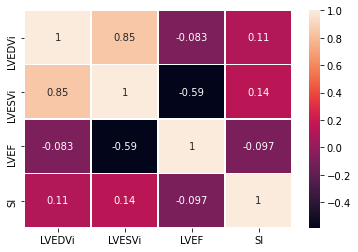

In [106]:
import seaborn as sns
ax = sns.heatmap(heat_array, linewidth=0.5,annot=True, xticklabels=names, yticklabels=names)
plt.savefig("heatplot.png")

3. Scatterplot

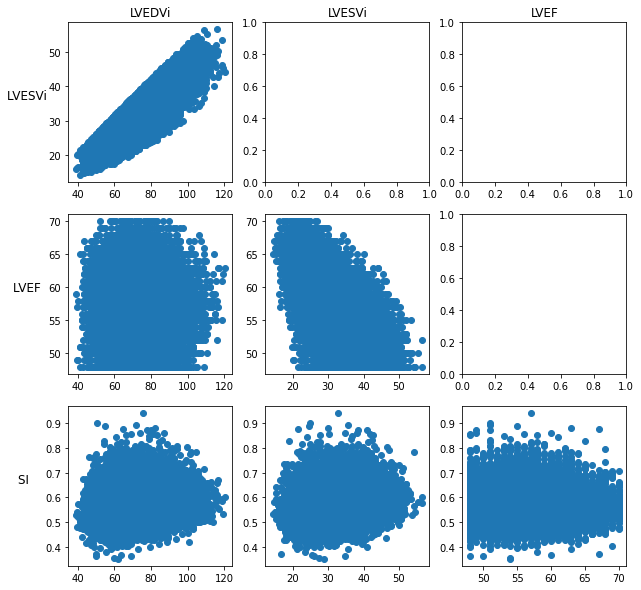

In [136]:
fig, ax = plt.subplots(ncols=3, nrows=3, figsize=(10, 10))

for iidx, i in enumerate(l):
    for jidx in range(iidx+1,len(l)):
        j = l[jidx]
        ax[jidx-1, iidx ].scatter(i.pheno,j.pheno)
        
for a, name in zip(ax[0], names):
    a.set_title(name)
    
for a, name in zip(ax[:,0], names[1:]):
    a.set_ylabel(name+"         ", rotation=0, size='large')

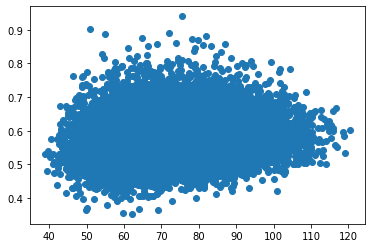

In [140]:
plt.scatter(df_lvedvi.pheno, df_si.pheno)

In [142]:
np.mean(df_lvedvi['pheno'])

72.9686518923108

In [144]:
np.std(df_lvedvi['pheno'])

11.557438325264188

In [145]:
np.mean(df_lvesvi['pheno'])

31.448726692562428

In [146]:
np.std(df_lvesvi['pheno'])

6.180548430635957